<a href="https://colab.research.google.com/github/esrayuzgec/AlzheimerDetection/blob/main/AlzheimerData2.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"esrayuzgec","key":"38d38662eddc4827ce5088ed6044748a"}'}

In [ ]:
!mkdir –p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600  ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d basheersaeed/alzheimers-brain-mri

In [ ]:
from zipfile import ZipFile
file_name="alzheimers-brain-mri.zip"

In [ ]:
with ZipFile(file_name,'r') as zip:  #Zip halinde gelenn dosyayı  açtık
  zip.extractall()
  print('done')

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
from fastai.vision.all import *

In [ ]:
path=Path("/content/MRI/Training")
path.ls()

(#3) [Path('/content/MRI/Training/.ipynb_checkpoints'),Path('/content/MRI/Training/CN'),Path('/content/MRI/Training/AD')]

In [ ]:
item_tfms = Resize(128)
batch_tfms = aug_transforms=[Normalize.from_stats(*imagenet_stats)]

In [ ]:
brain = DataBlock(blocks=(ImageBlock,CategoryBlock),
                  get_items= get_image_files,
                  get_y = parent_label,
                  splitter =RandomSplitter(valid_pct= 0.2, seed=42),
                  item_tfms = item_tfms,
                  batch_tfms = batch_tfms
                  )

In [ ]:
dls = brain.dataloaders(path,bs=32)

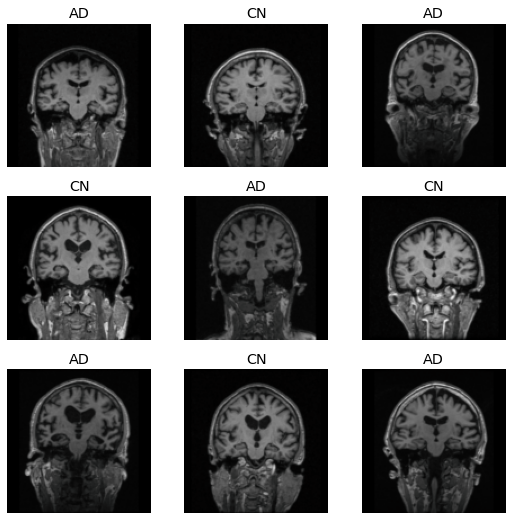

In [ ]:
dls.show_batch(max_n=9,unique=False)

In [ ]:
learn= cnn_learner(dls,vgg16_bn, pretrained=True, metrics=[accuracy,error_rate])

SuggestedLRs(lr_min=0.002754228748381138, lr_steep=6.309573450380412e-07)

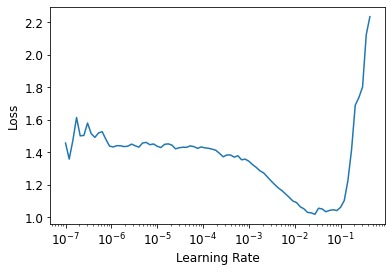

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(20,1.2e-3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.570255,0.762992,0.562500,0.437500,00:31


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.046554,0.819846,0.525000,0.475000,00:32
1,0.869239,0.841867,0.600000,0.400000,00:32
2,0.722722,0.762843,0.650000,0.350000,00:32
3,0.603818,0.687795,0.712500,0.287500,00:32
4,0.489884,0.721403,0.687500,0.312500,00:32
5,0.401961,0.687080,0.725000,0.275000,00:32
6,0.321334,0.865494,0.687500,0.312500,00:32
7,0.268303,0.865468,0.712500,0.287500,00:32
8,0.219168,0.847554,0.687500,0.312500,00:32
9,0.179563,0.889072,0.675000,0.325000,00:32


In [ ]:
learn.save('stage_1')

Path('models/stage_1.pth')

In [ ]:
learn.unfreeze()

In [ ]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.025159,1.004624,0.700000,0.300000,00:31


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.004201,1.157056,0.700000,0.300000,00:32
1,0.022581,1.329409,0.650000,0.350000,00:32
2,0.047613,2.066498,0.662500,0.337500,00:32
3,0.106336,2.230693,0.637500,0.362500,00:32
4,0.163265,1.509858,0.687500,0.312500,00:32
5,0.175547,1.263818,0.737500,0.262500,00:32
6,0.156272,1.373817,0.750000,0.250000,00:32
7,0.129681,1.356243,0.750000,0.250000,00:32
8,0.104639,1.353677,0.762500,0.237500,00:32
9,0.091942,1.355575,0.762500,0.237500,00:32


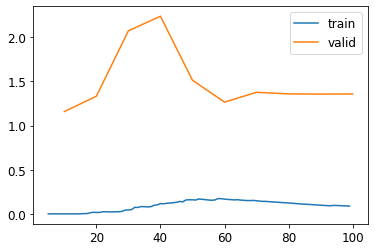

In [ ]:
learn.recorder.plot_loss()

In [ ]:
interp=ClassificationInterpretation.from_learner(learn)

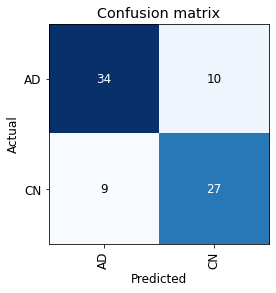

In [ ]:
interp.plot_confusion_matrix()

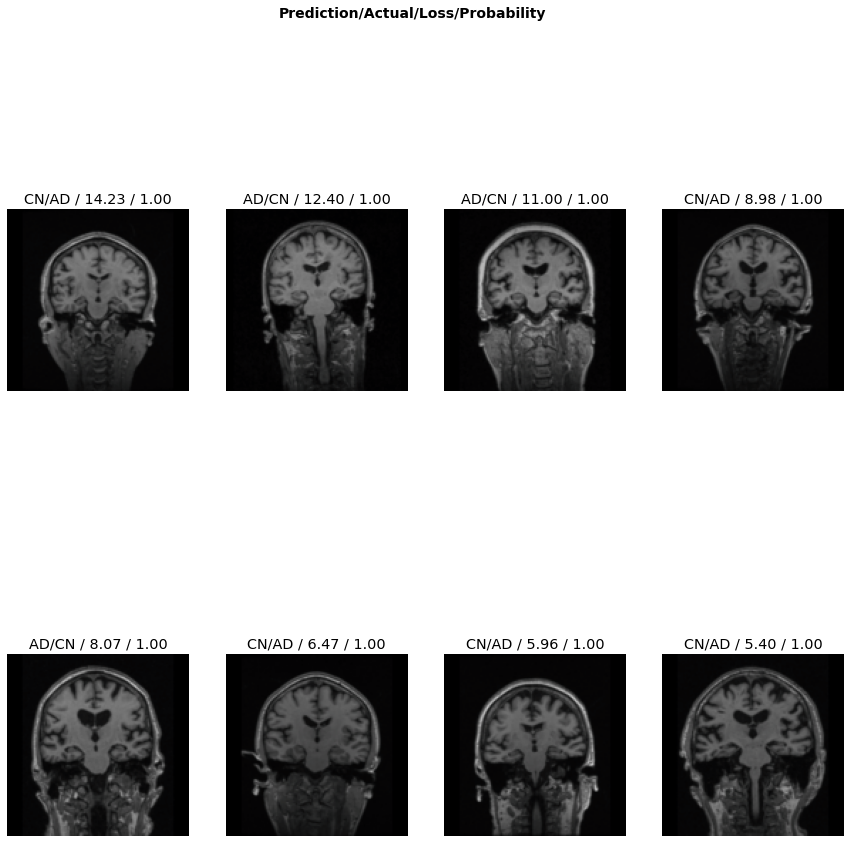

In [ ]:
interp.plot_top_losses(8, figsize=(15,15))